# Chapter 6. 결정 트리

SVM처럼 **결정 트리**(Decision Tree)는 분류와 회귀작업, 그리고 다중 출력 작업도 가능한 다재다능한 머신러닝 알고리즘입니다. 또한 매우 복잡한 데이터셋도 학습할 수 있는 강력한 알고리즘입니다. 

결정트리는 최근에 자주 사용되는 가장 강력한 머신러닝 알고리즘 중 하나인 랜덤 폴세스트의 기본 구성 요소이기도 합니다. 

이 장에서는 결정 트리의 훈련, 시각화, 예측 방법에 대해 먼저 살펴보겠습니다. 그런 다음 사이킷런의 CART 훈련 알고리즘을 둘러보고 트리에 규제를 가하는 방법과 회귀 문제에 적용하는 방법을 알압도ㅗ록 하겠습니다. 마지막으로 결정 트리의 제약 사항에 관해 이야기하겠습니다.

## 6.1 결정 트리 학습과 시각화

결정 트리를 이해하기 위해 일단 하나를 만들어서 어떻게 예측하는지 살펴보도록 하겠습니다.

아래는 붓꽃 데이터셋에 `DecisionTreeClassifier`를 만들어서 훈련시키는 코드입니다. 

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎의 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

`export_graphviz()` 함수를 사용해 그래프의 정의를 iris_tree.dot 파일로 출력하여 훈련된 결정 트리를 시각화할 수 있습니다.

In [4]:
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

In [8]:
from sklearn.tree import export_graphviz

f = open("./iris_tree.dot", "w")
export_graphviz(
    tree_clf,
    out_file = f,
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)
f.close()

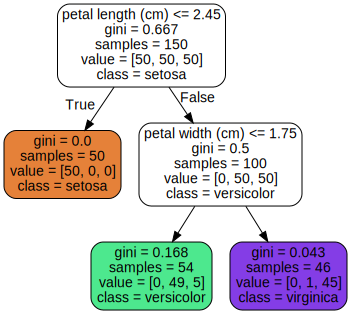

In [9]:
import graphviz

with open("./iris_tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename = "iris_tree", directory = ".", cleanup = True)
dot

## 6.2 예측하기

트리가 어떻게 예측을 만들어내는지 살펴봅시다.

새로 발견한 붓꽃의 품종을 분류한다고 가정햅보시다. 먼저 **루트 노드**(root node)에서 시작합니다. 이 노드는 꽃잎의 길이가 2.45cm 보다 짧은지 검사합니다. 만약 그렇다면 루트 노드에서 왼쪽의 자식 노드로 이동합니다. 이 경우 이 노드가 **리프 노드**(leaf node), 즉 추가적인 자식을 가지지 않는 노드이므로 추가적인 검사를 하지 않습니다. 

노드의 `sample` 속성은 얼마나 많은 훈련 샘플이 적용되었는지 헤아린 것입니다. 예를 들어 100개의 훈련 샘플의 꽃잎의 길이가 2.45cm보다 길고, 그 중 54개의 샘플의 꽃잎 너비가 1.75cm보다 짧습니다. 노드의 `value` 속성은 노드에서 각 클래스에 얼마나 많은 훈련 샘플이 있는지 알려줍니다. 

마지막으로 노드의 `gini` 속성은 **불순도**(impurity)를 측정합니다. 한 노드의 모든 샘플이 같은 클래스에 속해있다면 이 노드를 순수(`gini`=0)이라고 합니다. 예를 들어 깊이 1의 왼쪽 노드는 Iris-Setosa 훈련 샘플만 가지고 있으므로 순수 노드이고 `gini` 점수가 0입니다. $i$번째 노드의 `gini` 점수 `G_i`를 계산하는 방법은 아래와 같습니다.


$$ G_i = 1 - \sum^n_{k=1}{p_{i, k}}^{2} $$


사이킷런은 **이진 트리**만 만드는 CART 알고리즘을 사용합니다. 그러므로 리프 노드 외의 모든 노드는 자식 노드를 두개씩 가집니다. 하지만 ID3 같ㅇ든 알고리즘은 둘 이상의 자식 노드를 가진 결정 트리를 만들 수 있습니다.



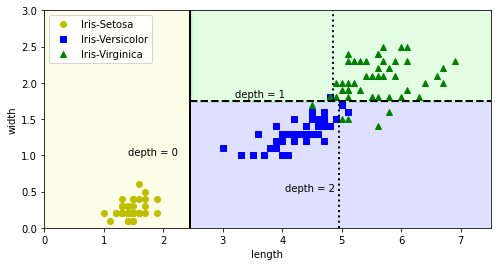

In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes = [0, 7.5, 0, 3], iris=True, legend=False, plot_training = True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo', label='Iris-Setosa')
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', label='Iris-Versicolor')
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], 'g^', label='Iris-Virginica')
        plt.axis(axes)
    if iris:
        plt.xlabel("length")
        plt.ylabel("width")
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc='lower right', fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], 'k-', linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], 'k--', linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], 'k:', linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], 'k:', linewidth=2)
plt.text(1.40, 1.0, "depth = 0")
plt.text(3.2, 1.8, "depth = 1")
plt.text(4.05, 0.5, "depth = 2")
plt.legend()

plt.show()

위 그림은 이 결정 트리의 결정 경계를 보여줍니다. 굵은 수직선이 루트 노드(깊이 0)의 결정 경계(꽃잎 길이 = 2.45cm)를 나타냅니다. 왼쪽 영역은 순수 노드(Iris-Setosa)이기 때문에 더이상 나눌 수 없습니다.

하지만 오른쪽 영역은 순수 노드가 아니므로 깊이 1의 오른쪽 노드는 꽃잎 너미 1.75cm에서 나누어집니다. `max_depth`를 2로 설정했기 때문에 결정 트리는 더이상 분할되지 않습니다. 하지만 `max_depth`를 3으로 하면 깊이 2의 두 노드가 각각 결정 경계를 추가로 만듭니다.

> 모델 해석 : 화이트 박스와 블랙 박스

여기에서 볼 수 있듯이 결정트리는 매우 직관적이고 결정 방식을 이해하기 쉽습니다. 이런 모델을 **화이트 박스**(white box)라고 합니다. 반대로 앞으로 보게 될 랜덤 포레스트나 신경망은 **블랙 박스**(black box)모델입니다. 이 알고리즘들은 뛰어나고 예측을 만드는 연산 과정을 쉽게 확인할 수 있습니다. 그렇지만 왜 그런 예측을 만드는지 쉽게 설명하기 어렵습니다. 


## 3. 클래스 확률 추정

결정 트리는 한 샘플이 특정 클래스 $k$에 속할 확률을 추정할수도 있습니다. 먼저 이 샘플에 대해 리프 노드를 찾기 위해 트리를 탐색하고 그 노드에 있는 클래스 $k$의 훈련 샘플의 비율을 반환합니다. 예를 들어 깊이가 5cm이고 너비가 1.5cm인 꽃잎을 발견했다고 가정합시다. 이에 해당하는 리프노드는 깊이 2에서 왼쪽 노드이므로 결정 트리는 그에 해당하는 확률을 출력합니다. 

한번 확인해봅시다.

In [13]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

Iris-Versicolor는 90%, Iris-Virginicasms 9.3%를 예측합니다! 

## 4. CART 훈련 알고리즘

사이킷런은 결정트리를 훈련시키기 위해 CART(Classification And Regression Tree)알고리즘을 사용합니다. 이 알고리즘의 아이디어는 매우 간단합니다.

먼저 훈련 세트를 하나의 특성 $k$의 임곗값 $t_k$를 사용해 두개의 서브셋으로 나눕니다. 어떻게 크기에 따라 가중치가 적용된 가장 순수한 서브셋으로 나눈ㄹ 수 있는 $(k, t_k)$ 이 알고리즘이 최소화해야하는 비용 함수는 아래와 같습니다.

$$ J(k, t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right} $$

(여기서 $G_{left/right}$는 왼쪽/오른쪽의 불순도, $m_{left/right}$는 왼쪽/오른쪽 서브셋의 샘플 수)

훈련 세트를 성공적으로 둘로 나누었다면 같은 방식으로 서브셋을 또 나누고 그 다음엔 서브셋의 서브셋을 나누고 이런식으로 반복합니다. 이 과정은 최대 깊이가 되면 중지하거나 불순도를 줄이는 분할을 찾을 수 없을 때 멈추게 됩니다. 여러가지 매개 변수가 중지 조건에 관여합니다.

여기에서 볼 수 있듯이 CART 알고리즘은 **그리디 알고리즘**입니다. 맨 위 노트에서 최적의 분할을 찾으며 각 단계에서 이 과정을 반복합니다. 현재 단계의 분할이 몇 단계를 거쳐 가장 낮은 불순도로 이어질 수 있을지 없을지는 고려하지 않습니다. 탐욕적 알고리즘은 종종 납득할만한 훌륭한 솔루션을 만들어내지만 최적의 솔루션을 보장하지는 않습니다.

불행하게도 최적의 트리를 찾는 것은 **NP-완전**(NP-Complete)문제로 알려져 있습니다. 이 문제는 $O(exp(m))$의 시간이 필요하고 매우 작은 훈련세트에도 적용하기 어렵습니다. 그러므로 '납득할만한 솔루션'으로 만족해야 합니다.